In [159]:
# dependencies
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import pandas as pd
import time
from scipy.stats import linregress

#import api key
from config import weather_api_key

#import citipy
from citipy import citipy

In [160]:
# Set up lists to hold response info
cities = []
lat_lngs = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Confirm sufficient city count
len(cities)

606

In [50]:
units = 'imperial'
# build query url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

In [53]:
# create arrays to be appended
city_data = []
temp = []
hum = []
cloud = []
wind = []
lat = []
lon = []

count = 0

for city in cities:
    json_response = requests.get(query_url + city).json()
    try:
        city_data.append(json_response['name'])
        temp.append(json_response['main']['temp_max'])
        hum.append(json_response['main']['humidity'])
        cloud.append(json_response['clouds']['all'])
        wind.append(json_response['wind']['speed'])
        lat.append(json_response['coord']['lat'])
        lon.append(json_response['coord']['lon'])
        count +=1
        print(f"{count}: Appending weather data for {city}")
                
    except KeyError:
        print(f"----Records not found for {city}----")

print("------------------------------")        
print("All cities have been processed")


1: Appending weather data for new norfolk
2: Appending weather data for comodoro rivadavia
3: Appending weather data for kang
4: Appending weather data for goma
5: Appending weather data for bengkulu
6: Appending weather data for kapaa
7: Appending weather data for port-gentil
8: Appending weather data for ambanja
9: Appending weather data for albany
----Records not found for kuche----
10: Appending weather data for tasiilaq
11: Appending weather data for puerto ayora
12: Appending weather data for vaini
13: Appending weather data for visby
14: Appending weather data for shingu
15: Appending weather data for muli
----Records not found for barentsburg----
16: Appending weather data for pevek
17: Appending weather data for lompoc
18: Appending weather data for mabaruma
19: Appending weather data for matehuala
20: Appending weather data for cape town
----Records not found for nizhneyansk----
----Records not found for angra----
21: Appending weather data for kavaratti
22: Appending weather

In [119]:
#import data into a weather data frame
weather_df = pd.DataFrame({"City Name": city_data,
                           "Max Temperature (F)": temp,
                           "Humidity (%)": hum,
                           "Cloudiness (%)": cloud,
                           "Wind Speed (mph)": wind,
                           "Latitude": lat,
                           "Longitude": lon})
weather_df.head()

City Name  Max Temperature (F)  Humidity (%)  Cloudiness (%)  \
0         New Norfolk                53.01            85               0   
1  Comodoro Rivadavia                64.40            42               0   
2                Kang                77.07            33               5   
3                Goma                69.39            85             100   
4            Bengkulu                77.67            87             100   

   Wind Speed (mph)  Latitude  Longitude  
0              1.01  -42.7826   147.0587  
1             10.36  -45.8667   -67.5000  
2             12.82  -23.6752    22.7876  
3              1.50   -1.6792    29.2228  
4              4.90   -3.8004   102.2655

In [128]:
# create data file for city weather data in csv file
out_put_file = os.path.join("Analysis/WeatherAPI/weather_df.txt")

with open(out_put_file, 'w') as txtFile:
    txtFile.write(weather_df)

txtFile.close()

TypeError: write() argument must be str, not DataFrame

In [129]:
# check data types
weather_df.dtypes

City Name               object
Max Temperature (F)    float64
Humidity (%)             int64
Cloudiness (%)           int64
Wind Speed (mph)       float64
Latitude               float64
Longitude              float64
dtype: object

In [130]:
# describe data
weather_df.describe()

Max Temperature (F)  Humidity (%)  Cloudiness (%)  Wind Speed (mph)  \
count           559.000000    559.000000      559.000000        559.000000   
mean             62.509499     65.762075       55.871199          8.353131   
std              21.010691     22.773049       38.449490          5.399617   
min              -1.440000      2.000000        0.000000          0.650000   
25%              47.235000     52.500000       20.000000          4.515000   
50%              64.990000     70.000000       71.000000          6.910000   
75%              78.825000     83.000000       93.500000         11.110000   
max             107.960000    100.000000      100.000000         32.210000   

         Latitude   Longitude  
count  559.000000  559.000000  
mean    21.994660   21.996626  
std     33.104312   89.888517  
min    -54.800000 -179.166700  
25%     -4.644600  -52.925000  
50%     27.916700   24.076000  
75%     49.786550  102.389850  
max     78.218600  179.316700

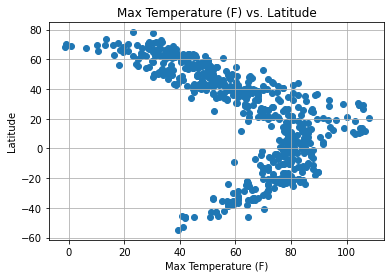

According to the scatterplot, cities that are closer to the equator,
have a higher temperature than cities that are further away from the equator.


In [131]:
#create scatter pluts comparing temp and lat
plt.scatter(weather_df["Max Temperature (F)"], weather_df["Latitude"])
plt.title("Max Temperature (F) vs. Latitude")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Analysis/WeatherAPI/tempvslat.png")

plt.show()
print("According to the scatterplot, cities that are closer to the equator,")
print("have a higher temperature than cities that are further away from the equator.")

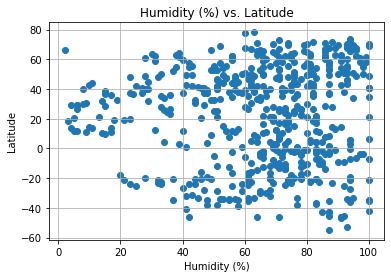

According to the scatterplot, there humidity ranges widely depending on your location.
There is no clear direct relation shown.
There is a stronger cluster of citied with high humidity overall, however they are spread evenly between distances from the equator.
There are fewer cities with humidity below 50%, and they tend to be in the northern hemisphere and are at or below 40 degrees lat.


In [132]:
#create scatter pluts comparing hum vs lat
plt.scatter(weather_df["Humidity (%)"], weather_df["Latitude"])
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Analysis/WeatherAPI/humvslat.png")

plt.show()
print("According to the scatterplot, there humidity ranges widely depending on your location.")
print("There is no clear direct relation shown.")
print("There is a stronger cluster of citied with high humidity overall, however they are spread evenly between distances from the equator.")
print("There are fewer cities with humidity below 50%, and they tend to be in the northern hemisphere and are at or below 40 degrees lat.")

In [133]:
#create scatter pluts comparing cloud vs lat
plt.scatter(weather_df["Cloudiness (%)"], weather_df["Latitude"])
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Analysis/WeatherAPI/cloudvslat.png")

plt.show()
print("According to the scatterplot, there is no apparent correlation betwen latitude and coudiness.")
print("The distribution is even across all lattitues")

According to the scatterplot, there is no apparent correlation betwen latitude and coudiness.
The distribution is even across all lattitues


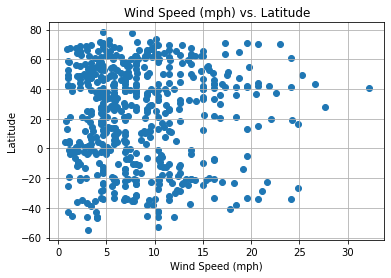

According to the scatterplot, wind speed overall is does not exceed 15 mph for the majority of the cities.
There appears to be a higher cluster of cities in the northeren hemisphere that have wind speeds
between 0 mph and 10 mph when compared to the southern hemisphere as a whole


In [136]:
#create scatter pluts comparing wind speed vs lat
plt.scatter(weather_df["Wind Speed (mph)"], weather_df["Latitude"])
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Analysis/WeatherAPI/windvslat.png")

plt.show()
print("According to the scatterplot, wind speed overall is does not exceed 15 mph for the majority of the cities.")
print("There appears to be a higher cluster of cities in the northeren hemisphere that have wind speeds")
print("between 0 mph and 10 mph when compared to the southern hemisphere as a whole")

In [138]:
# create new df to spilt the n and s hemispheres
northern_df = weather_df.loc[weather_df["Latitude"] >= 0, :]
southern_df = weather_df.loc[weather_df["Latitude"] < 0, :]
northern_df.head()

City Name  Max Temperature (F)  Humidity (%)  Cloudiness (%)  \
5      Kapaa                71.60            83              90   
8     Albany                54.00            75             100   
9   Tasiilaq                32.00            64              20   
12     Visby                50.00            52               0   
13    Shingū                56.05            76               0   

    Wind Speed (mph)  Latitude  Longitude  
5              16.11   22.0752  -159.3190  
8               1.01   42.6001   -73.9662  
9              14.97   65.6145   -37.6368  
12              8.05   57.6409    18.2960  
13              6.06   33.7333   135.9833

In [139]:
southern_df.head()

City Name  Max Temperature (F)  Humidity (%)  Cloudiness (%)  \
0         New Norfolk                53.01            85               0   
1  Comodoro Rivadavia                64.40            42               0   
2                Kang                77.07            33               5   
3                Goma                69.39            85             100   
4            Bengkulu                77.67            87             100   

   Wind Speed (mph)  Latitude  Longitude  
0              1.01  -42.7826   147.0587  
1             10.36  -45.8667   -67.5000  
2             12.82  -23.6752    22.7876  
3              1.50   -1.6792    29.2228  
4              4.90   -3.8004   102.2655

In [164]:
# nh- temp v lat
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/nh_temp_v_lat.png")

print("There is a strong correlation between temperature and latitude.  As latitude increases, temperature decreases")
print("This means there is a higher temperature for cities closer to the equator in the northern hemisphere")

There is a strong correlation between temperature and latitude.  As latitude increases, temperature decreases
This means there is a higher temperature for cities closer to the equator in the northern hemisphere


<Figure size 432x288 with 0 Axes>

In [165]:
# sh- temp v lat
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/sh_temp_v_lat.png")

print("There is a strong correlation between temperature and latitude.  As latitude decreases, temperature decreases as well")
print("This means there is a lowr temperature for cities further away from to the equator in the southern hemisphere.")

There is a strong correlation between temperature and latitude.  As latitude decreases, temperature decreases as well
This means there is a lowr temperature for cities further away from to the equator in the southern hemisphere.


<Figure size 432x288 with 0 Axes>

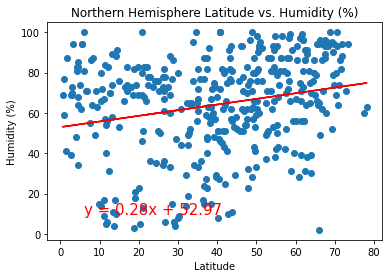

There is a weak correlation between latitude and humidity.  However, cities closer to the equator are more likely to have high humidity.


<Figure size 432x288 with 0 Axes>

In [169]:
# nh- hum v lat
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/nh_hum_v_lat.png")

print("There is a weak correlation between latitude and humidity.  However, cities closer to the equator are more likely to have high humidity.")

In [170]:
# sh- hum v lat
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/sh_hum_v_lat.png")

print("There is a very weak if any correlation between latitude and humidity. However cities that are cloder to the equator are more likely to have high humidity than low.")
print("Cities that are between -30 and -20 latitudes are evenly spread between low and high humidity")

There is a very weak if any correlation between latitude and humidity. However cities that are cloder to the equator are more likely to have high humidity than low.
Cities that are between -30 and -20 latitudes are evenly spread between low and high humidity


<Figure size 432x288 with 0 Axes>

In [173]:
# nh- hum v lat
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/nh_cloud_v_lat.png")

print("There is no correlation between cloudiness and latitude in the northern hemisphere")

There is no correlation between cloudiness and latitude in the northern hemisphere


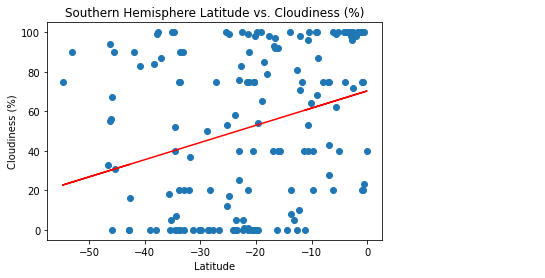

There is no correlation between cloudiness and latitude in the southern hemisphere


<Figure size 432x288 with 0 Axes>

In [175]:
# sh- hum v lat
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/sh_cloud_v_lat.png")

print("There is no correlation between cloudiness and latitude in the southern hemisphere")

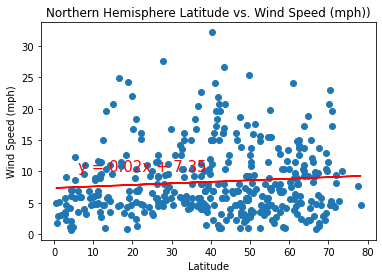

Overall city wind speeds are below 15 mph whether the city is close to the equator or further away.
There is no correlation between wind speed and latitude as the data is evenly distributed in the northern hemisphere.


<Figure size 432x288 with 0 Axes>

In [178]:
# nh- wind v lat
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Wind Speed (mph))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/nh_wind_v_lat.png")

print("Overall city wind speeds are below 15 mph whether the city is close to the equator or further away.")
print("There is no correlation between wind speed and latitude as the data is evenly distributed in the northern hemisphere.")

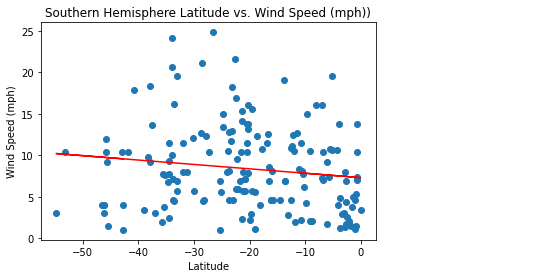

Overall city wind speeds are below 15 mph whether the city is close to the equator or further away.
There is no correlation between wind speed and latitude as the data is evenly distributed in the southern hemisphere.


<Figure size 432x288 with 0 Axes>

In [179]:
# sh- wind v lat
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Wind Speed (mph))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/sh_wind_v_lat.png")

print("Overall city wind speeds are below 15 mph whether the city is close to the equator or further away.")
print("There is no correlation between wind speed and latitude as the data is evenly distributed in the southern hemisphere.")